In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import mglearn
import platform

if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

# 비지도 학습(unsupervised learning)

## 주성분 분석 : PCA; 어떤 성분이 가장 주가 되는가?

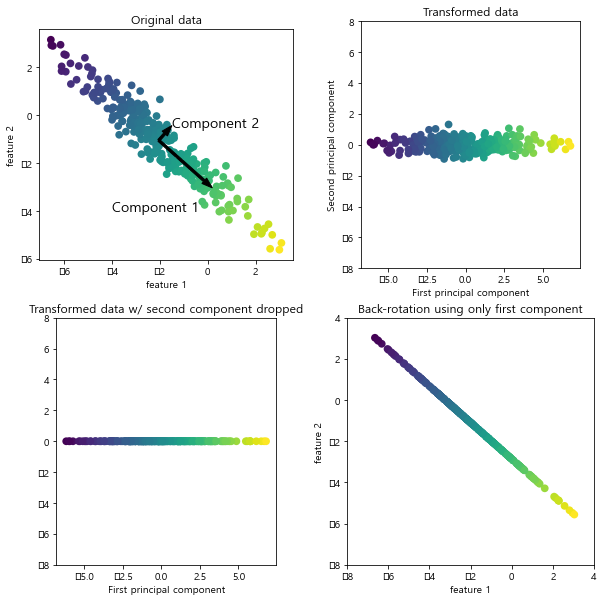

In [2]:
mglearn.plots.plot_pca_illustration()

figure를 대표하는 성분이 주성분이 됨. component1이 주성분.

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

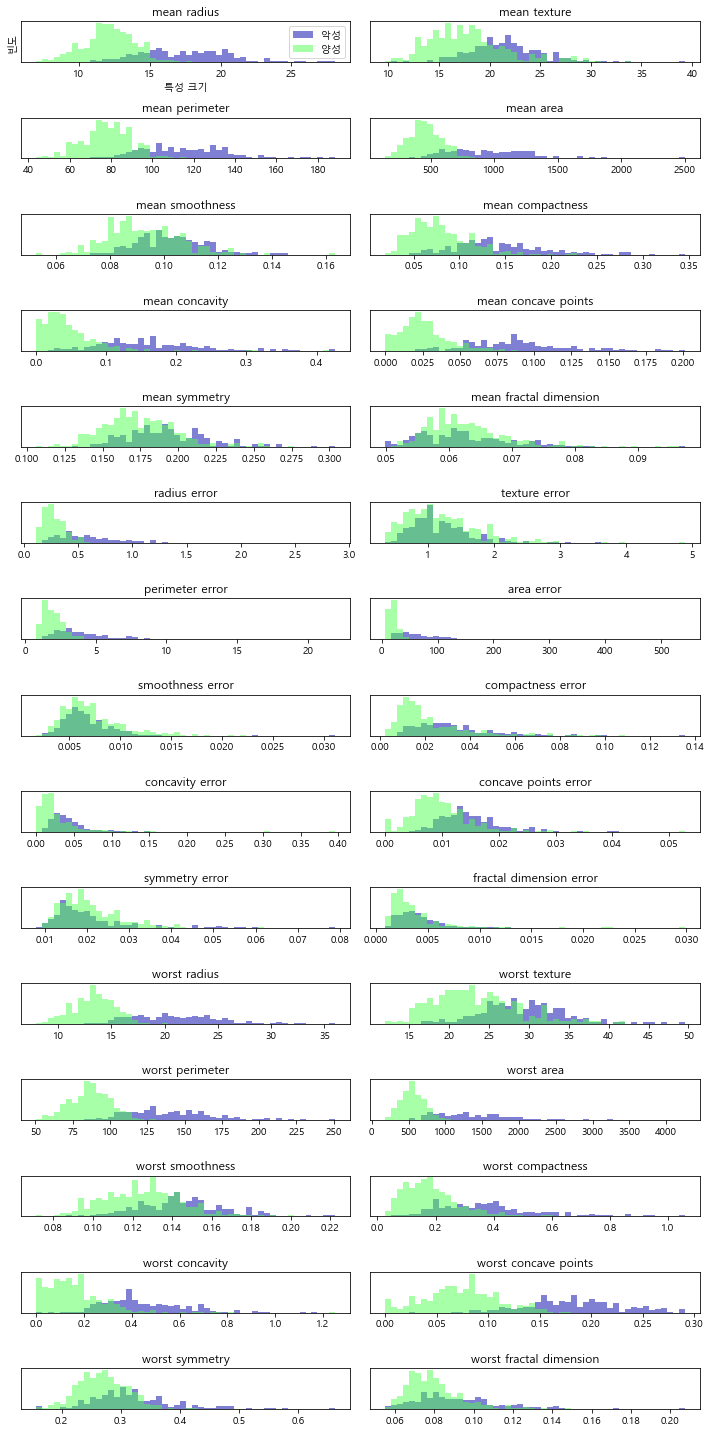

In [5]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))  # 행방향 15개, 열방향 2개
maligant = cancer.data[cancer.target == 0]  # 악성만 추출 == cancer
benign = cancer.data[cancer.target == 1]  # 양성만 추출 == 정상
ax = axes.ravel()  # 2차원 정보를 1차원으로 차원 축소
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(maligant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)  # 악성에 대한 그래프 표현
    ax[i].hist(benign[:, i], bins = bins, color=mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc = 'best')
fig.tight_layout()

위 결과를 1차원으로 차원 축소

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

minmax_scaler : 0과 1사이에 data를 집약

standard_scaler : 평균이 0, 표준편차가 1인 영역에 data를 집약

여러 data를 동일한 option으로 관찰

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # n_components를 지정해 주어야 함. 유방암 dataset에서는 악성과 양성을 관찰해야 하기 때문에 2로 설정.
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [9]:
print("원본 데이터 형태:", str(X_scaled.shape))  # 원본 데이터 형태: (569, 30)
print("축소된 데이터 형태:", str(X_pca.shape))  # 축소된 데이터 형태: (569, 2) ==> 30개의 column을 2개의 column으로 축소

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


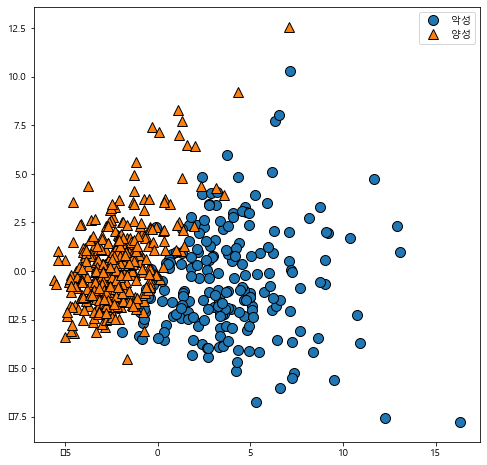

In [10]:
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc = 'best')
plt.show()

In [11]:
print('PCA 주성분 형태:', pca.components_.shape)
# PCA 주성분 형태: (2, 30)

PCA 주성분 형태: (2, 30)


In [12]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

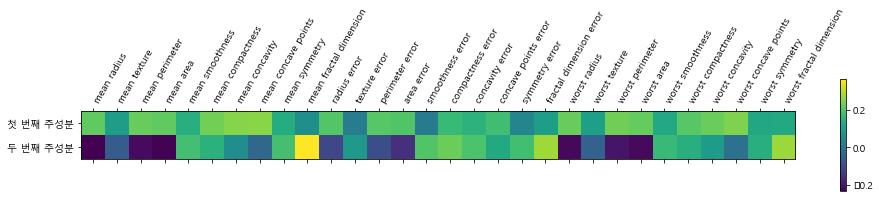

In [13]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.show()

# t-SNE : 차원 축소, 시각화

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

In [15]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

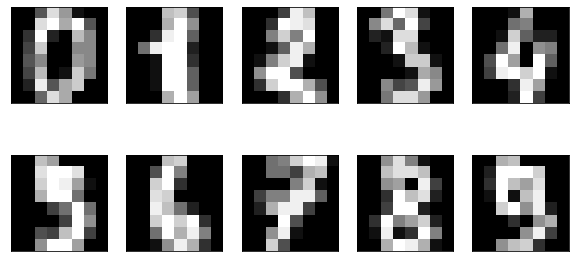

In [16]:
fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw = {'xticks' : (), 'yticks' : ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap = 'gray')

In [17]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

Text(0, 0.5, '두 번째 주성분')

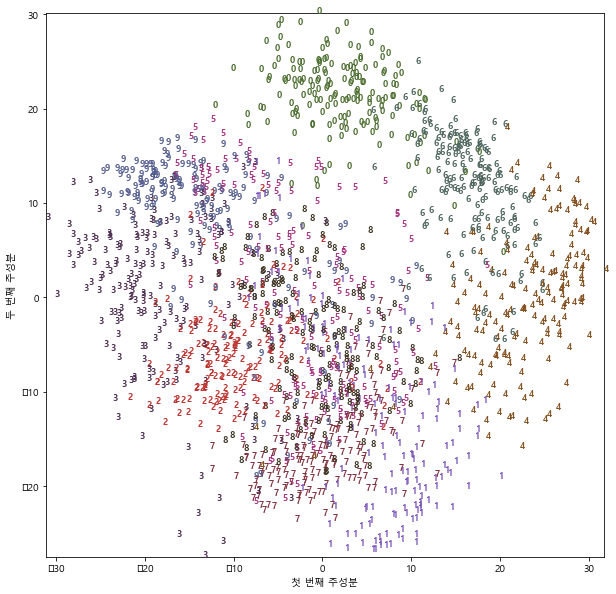

In [18]:
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그림
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict = {'weight': 'bold', 'size' : 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
# 인접한 두 object간의 relation 관찰에 유용 ==> NLP에 사용됨

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(random_state = 42)

In [21]:
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE 특성 1')

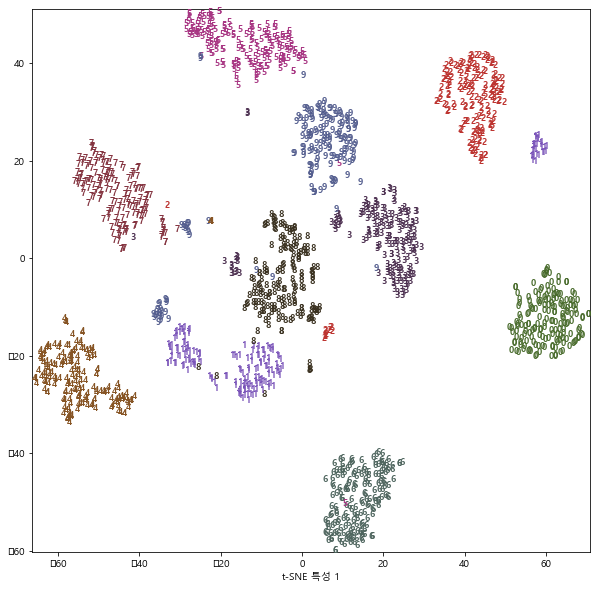

In [22]:
plt.figure(figsize = (10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 표현
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict = {'weight' : 'bold', 'size' : 9})
plt.xlabel('t-SNE 특성 0')
plt.xlabel('t-SNE 특성 1')

이 알고리즘은 클래스 레이블 정보를 사용하지 않으므로 완전한 비지도 학습임. 그럼에도 원본 데이터 공간에서 포인트들이 얼마나 가까이 있는지에 대한 정보고 클래스가 잘 구분되는 2차원 표현을 찾음.

# k-평균 군집 : k-mean clustering

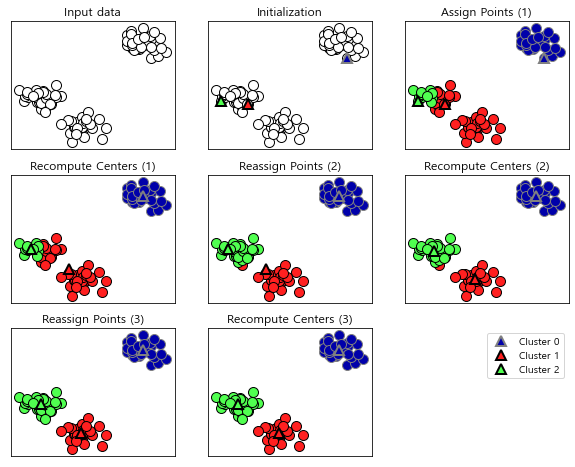

In [23]:
mglearn.plots.plot_kmeans_algorithm()

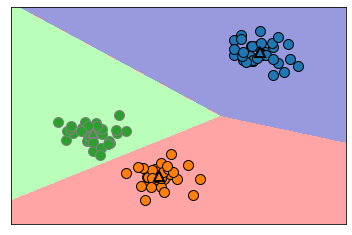

In [24]:
mglearn.plots.plot_kmeans_boundaries()

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

  # 2차원 데이터 생성
X, y = make_blobs(random_state = 1)

  # 군집 모델 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [26]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [27]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [28]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


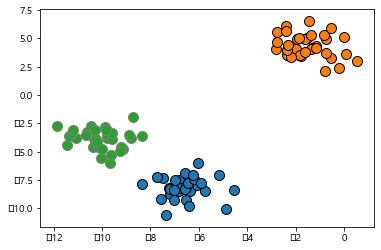

In [29]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = "o")
plt.show()

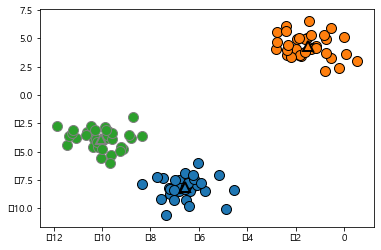

In [30]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = "o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers = '^', markeredgewidth = 2)
plt.show()

### 클러스터 수를 늘리거나 줄이는 상황

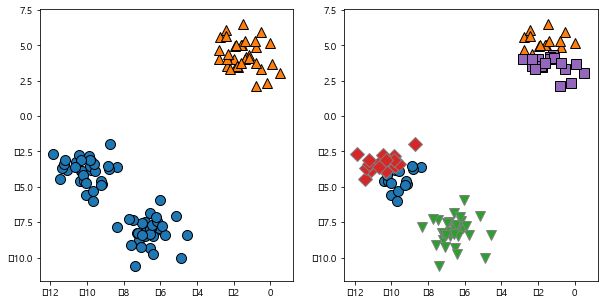

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

  # 두 개의 클러스터 중심 사용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0])

  # 다섯 개의 클러스터 중심 사용
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[1])

plt.show()

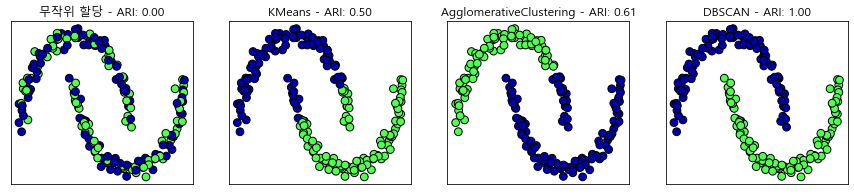

In [32]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

# 데이터 표현과 특성 공학

In [33]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [34]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [35]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [36]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
feature = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [38]:
X = feature.values

In [39]:
y = data_dummies['income_ >50K'].values

In [40]:
X.shape, y.shape

((32561, 44), (32561,))

In [41]:
# 모델 생성 ==> 모델 훈련 ==> 모델 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('test accuracy : {:.2f}'.format(logreg.score(X_test, y_test) * 100))
# test accuracy : 80.68

test accuracy : 80.68


# scikit-learn 에서 범주형 데이터 다루기 : OneHotEncoder, ColumnTransformer

In [43]:
demo_df = pd.DataFrame({'num feature' : [0, 1, 2, 1], '범주형 특성' : ['양말', '여우', '양말', '상자']})
display(demo_df)

,num feature,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [44]:
display(pd.get_dummies(demo_df))

,num feature,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [46]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출
data_features = data.drop('income', axis = 1)
# dataframe과 income을 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state = 0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [50]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


### make_column_transformer를 사용하여 ColumnTransformer 생성하기

In [51]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

# SVR 실습

In [52]:
X, y = mglearn.datasets.make_wave(n_samples=120)

In [53]:
import numpy as np

In [54]:
line = np.linspace(-3, 3, 1000, endpoint = False). reshape(-1, 1)

In [55]:
from sklearn.svm import SVR

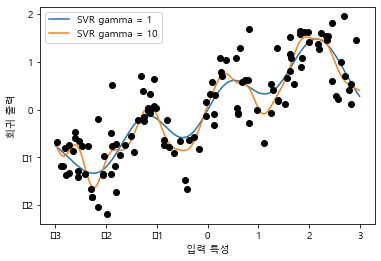

In [56]:
for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

plt.show()

# 모델 평가와 성능 향상

## class validation

In [57]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))
# 테스트 세트 점수: 0.88

테스트 세트 점수: 0.88


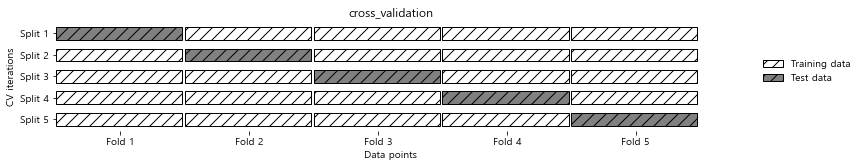

In [58]:
mglearn.plots.plot_cross_validation()

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)
#교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [60]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


In [61]:
print('교차 검증 평균:', scores.mean())

교차 검증 평균: 0.9669140383426098


In [62]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.01792264, 0.02592969, 0.01795149, 0.01894927, 0.0179522 ]),
 'score_time': array([0.        , 0.        , 0.        , 0.0009973 , 0.00099778]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

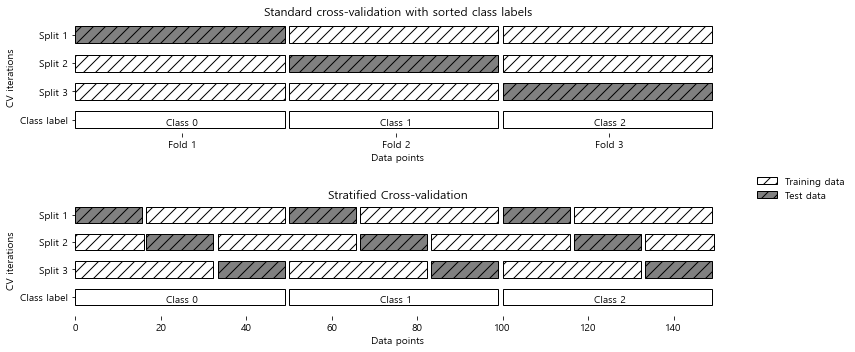

In [63]:
mglearn.plots.plot_stratified_cross_validation()

In [64]:
from sklearn.model_selection import KFold

In [65]:
kfold = KFold(n_splits=5)

In [66]:
cross_val_score(logreg, iris.data, iris.target, cv = kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [67]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv = kfold)
# array([0., 0., 0.]) ==> 학습 불가

array([0., 0., 0.])

In [68]:
kfold = KFold(n_splits=3, shuffle = True, random_state = 0)
cross_val_score(logreg, iris.data, iris.target, cv = kfold)
# array([0.98, 0.96, 0.96]) ==> 성공

array([0.98, 0.96, 0.96])

In [69]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("교차 검증 분할 수:", len(scores))
print("평균 정확도: {:.2f}%".format(scores.mean() * 100))

교차 검증 분할 수: 150
평균 정확도: 96.67%


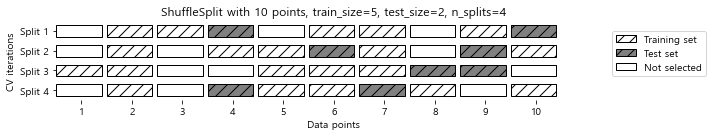

In [70]:
mglearn.plots.plot_shuffle_split()

In [71]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.98666667 0.97333333 0.94666667 0.97333333 0.94666667 0.98666667
 0.97333333 0.97333333 0.94666667 0.97333333]


# Grid Search

In [72]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


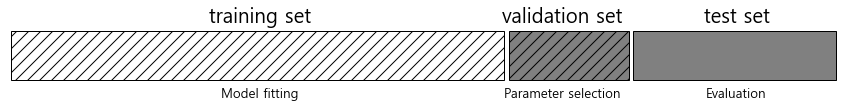

In [73]:
mglearn.plots.plot_threefold_split()

In [74]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


### 교차 검증을 사용한 그리드 서치

In [75]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

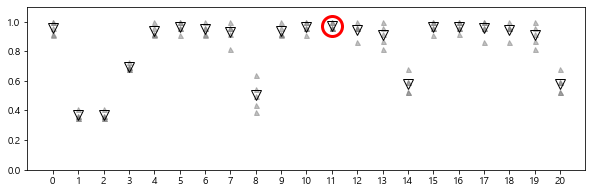

In [91]:
mglearn.plots.plot_cross_val_selection()

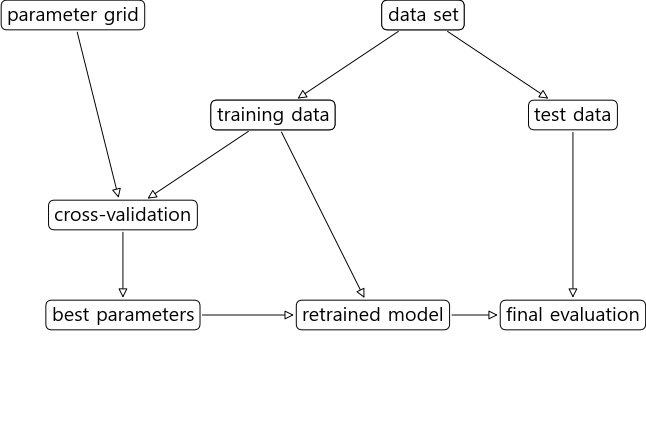

In [77]:
mglearn.plots.plot_grid_search_overview()

In [78]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

grid_search.fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

print("최고 성능 모델:\n", grid_search.best_estimator_)

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=10, gamma=0.1)


In [94]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000598574,0.000598383,0.000598383,0.000399446,0.000994587
std_fit_time,0.000488734,0.000488578,0.000488578,0.000489221,2.89499e-06
mean_score_time,0.000199509,0.000199413,0.000199413,0.000199366,0
std_score_time,0.000399017,0.000398827,0.000398827,0.000398731,0
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


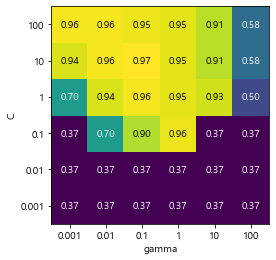

In [95]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")